## A CNN Model For Plant Disease Detection

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

### Initializing the CNN as a sequennce of layers

In [32]:
# Gtting number of output classes
from glob import glob
folders=glob('C:\\Users\\rafin\\Downloads\\PythonDataScience\\plant_disease\\New_Plant_Diseases_Dataset\\New_Plant_Diseases_Dataset\\train\\*')
num_of_classes=len(folders)
print(num_of_classes)

38


In [3]:
model=models.Sequential()

In [4]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [5]:
model.add(layers.Flatten())

In [6]:
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(num_of_classes, activation="softmax"))

In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy", metrics=['accuracy'])

### Image preprocessing
<p> Use the Image Data Generator to import the images from the dataset<p>
<p>Make sure you provide the same target size as initialied for the image size<p>

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
training_set = train_datagen.flow_from_directory(
        'C:\\Users\\rafin\\Downloads\\PythonDataScience\\plant_disease\\New_Plant_Diseases_Dataset\\New_Plant_Diseases_Dataset\\train',
        target_size=(128,128),
        batch_size=64,
        class_mode='categorical')

testing_set = test_datagen.flow_from_directory(
        'C:\\Users\\rafin\\Downloads\\PythonDataScience\\plant_disease\\New_Plant_Diseases_Dataset\\New_Plant_Diseases_Dataset\\valid',
        target_size=(128,128),
        batch_size=64,
        class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [34]:
class_names =  folders
class_names = sorted(class_names)
name_id_map=dict(zip(range(len(class_names)),class_names, ))

In [35]:
print(name_id_map)

{0: 'C:\\Users\\rafin\\Downloads\\PythonDataScience\\plant_disease\\New_Plant_Diseases_Dataset\\New_Plant_Diseases_Dataset\\train\\Apple___Apple_scab', 1: 'C:\\Users\\rafin\\Downloads\\PythonDataScience\\plant_disease\\New_Plant_Diseases_Dataset\\New_Plant_Diseases_Dataset\\train\\Apple___Black_rot', 2: 'C:\\Users\\rafin\\Downloads\\PythonDataScience\\plant_disease\\New_Plant_Diseases_Dataset\\New_Plant_Diseases_Dataset\\train\\Apple___Cedar_apple_rust', 3: 'C:\\Users\\rafin\\Downloads\\PythonDataScience\\plant_disease\\New_Plant_Diseases_Dataset\\New_Plant_Diseases_Dataset\\train\\Apple___healthy', 4: 'C:\\Users\\rafin\\Downloads\\PythonDataScience\\plant_disease\\New_Plant_Diseases_Dataset\\New_Plant_Diseases_Dataset\\train\\Blueberry___healthy', 5: 'C:\\Users\\rafin\\Downloads\\PythonDataScience\\plant_disease\\New_Plant_Diseases_Dataset\\New_Plant_Diseases_Dataset\\train\\Cherry_(including_sour)___Powdery_mildew', 6: 'C:\\Users\\rafin\\Downloads\\PythonDataScience\\plant_disease\\N

In [17]:
from glob import glob
class_names = glob('*') # Reads all the folders in which images are present
class_names = sorted(class_names) # Sorting them
name_id_map = dict(zip(class_names, range(len(class_names))))

In [18]:
name_id_map

{'New_Plant_Diseases_Dataset': 0,
 'Plant_disease_test.ipynb': 1,
 'plant_disease_CNN - Copy.ipynb': 2,
 'plant_disease_CNN.ipynb': 3,
 'plant_disease_CNN_model.h5': 4,
 'test': 5}

### Fitting the model

In [11]:
#Early stopping to prevent overfitting 
early_stopping=tf.keras.callbacks.EarlyStopping(patience=3)

In [12]:
model.fit(
        training_set,
        epochs=25,
        validation_data=testing_set, verbose=2, callbacks=[early_stopping])

Epoch 1/25
1099/1099 - 4337s - loss: 1.2269 - accuracy: 0.6377 - val_loss: 0.7897 - val_accuracy: 0.7600
Epoch 2/25
1099/1099 - 2891s - loss: 0.5494 - accuracy: 0.8264 - val_loss: 0.7947 - val_accuracy: 0.7686
Epoch 3/25
1099/1099 - 3051s - loss: 0.3782 - accuracy: 0.8778 - val_loss: 0.4809 - val_accuracy: 0.8498
Epoch 4/25
1099/1099 - 3068s - loss: 0.3166 - accuracy: 0.8984 - val_loss: 0.4130 - val_accuracy: 0.8708
Epoch 5/25
1099/1099 - 3204s - loss: 0.2639 - accuracy: 0.9138 - val_loss: 0.4033 - val_accuracy: 0.8771
Epoch 6/25
1099/1099 - 3015s - loss: 0.2333 - accuracy: 0.9234 - val_loss: 0.2973 - val_accuracy: 0.9074
Epoch 7/25
1099/1099 - 2954s - loss: 0.2161 - accuracy: 0.9291 - val_loss: 0.3066 - val_accuracy: 0.9051
Epoch 8/25
1099/1099 - 2992s - loss: 0.1991 - accuracy: 0.9349 - val_loss: 0.4169 - val_accuracy: 0.8775
Epoch 9/25
1099/1099 - 3090s - loss: 0.1750 - accuracy: 0.9424 - val_loss: 0.3736 - val_accuracy: 0.8940


### Saving the model

In [13]:
from tensorflow.keras.models import load_model

In [14]:
model.save('plant_disease_CNN_model.h5')

### Model Performance

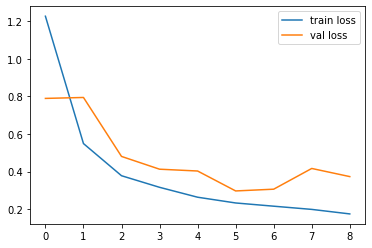

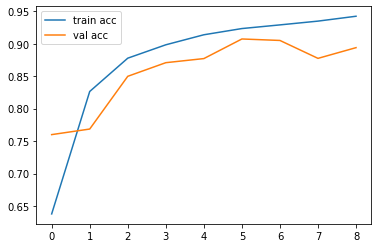

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model.history.history['accuracy'], label='train acc')
plt.plot(model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')